# Imports and Definitions

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from utils.data_utils import preprocess_and_normalize_energy_data
from sklearn.linear_model import LinearRegression
from feature_sets_analysis_utils import split_data_set, fit_model, compute_log_transformed_features, apply_data_transforms, test_model

SEED = 1223

In [15]:
param_cols = ['batch_size','image_size','kernel_size','in_channels','out_channels','stride','padding']
models = {}
estimates = {}

# Conv2d Module
## Load Data

In [16]:
data_unnormalized = pd.read_csv('../../data/conv2d-energies-parsed.csv')
data = preprocess_and_normalize_energy_data(data_unnormalized, param_cols, aggregate=True)

Shape before aggregation: (50, 42), after aggregation: (50, 31) (non numeric columns removed)


## Feature Set: Parameters

--------------------
Average R2 Cross-Validation Score: -0.151 (± 0.590)
Average MSE Cross-Validation: -9.691e-02 (± 5.073e-02)
Validation R2 Score: -2.258
Validation MSE: 1.143e-01
Test R2 Score: -1.721
Test MSE: 9.450e-02


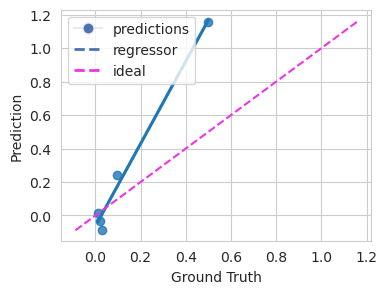

In [17]:
dfs = split_data_set(data, param_cols, SEED)
transformers_dict = {
    "x_preprocessors": [PolynomialFeatures(degree=4, interaction_only=True)],
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)
y_hat, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)
# save model & estimates
models['param'] = model
estimates['param'] = y_hat

## Feature-Set: Module Parameters + Log-Parameters


New Columns:  ['batch_size', 'image_size', 'kernel_size', 'in_channels', 'out_channels', 'stride', 'padding', 'log_batch_size', 'log_image_size', 'log_kernel_size', 'log_in_channels', 'log_out_channels', 'log_stride', 'log_padding']
--------------------
Average R2 Cross-Validation Score: -1.156 (± 1.386)
Average MSE Cross-Validation: -1.818e-01 (± 1.184e-01)
Validation R2 Score: -6.561
Validation MSE: 2.652e-01
Test R2 Score: -4.625
Test MSE: 1.953e-01


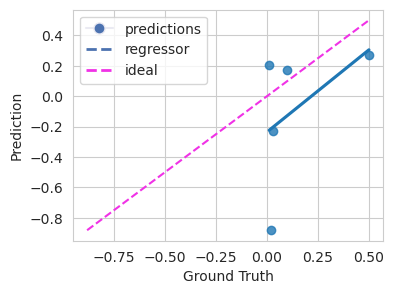

In [18]:
data_linear_with_log, param_cols_with_log = compute_log_transformed_features(data, param_cols)
dfs = split_data_set(data_linear_with_log, param_cols_with_log, SEED)
transformers_dict = {
    "x_preprocessors": [PolynomialFeatures(degree=2, interaction_only=True)],
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)
y_hat, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)
# save model & estimates
models['param_log_param'] = model
estimates['param_log_param'] = y_hat

## Feature-Set: MACs Only

--------------------
Average R2 Cross-Validation Score: 0.408 (± 0.180)
Average MSE Cross-Validation: -4.924e-02 (± 1.431e-02)
Validation R2 Score: 0.646
Validation MSE: 1.240e-02
Test R2 Score: 0.764
Test MSE: 8.187e-03


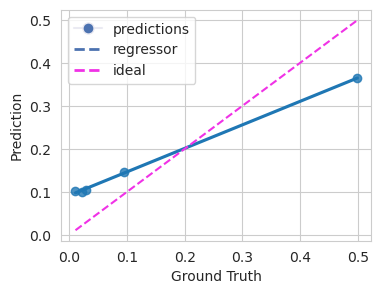

In [19]:
dfs = split_data_set(data, ['macs'], SEED)
transformers_dict = {
    "x_preprocessors": None,
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)
y_hat, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)
# save model & estimates
models['macs'] = model
estimates['macs'] = y_hat

# Feature-Set: Module Parameters + MACs

--------------------
Average R2 Cross-Validation Score: 0.750 (± 0.002)
Average MSE Cross-Validation: -2.089e-02 (± 4.645e-04)
Validation R2 Score: 0.816
Validation MSE: 6.439e-03
Test R2 Score: 0.830
Test MSE: 5.906e-03


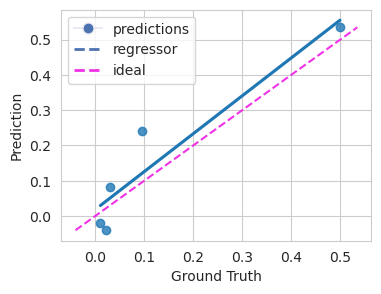

In [20]:
dfs = split_data_set(data, param_cols + ['macs'], SEED)
transformers_dict = {
    "x_preprocessors": [StandardScaler()],
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)
y_hat, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)
# save model & estimates
models['param_macs'] = model
estimates['param_macs'] = y_hat

## Feature-Set: Module Parameters + Log-Parameters + MACs

New Columns:  ['batch_size', 'image_size', 'kernel_size', 'in_channels', 'out_channels', 'stride', 'padding', 'log_batch_size', 'log_image_size', 'log_kernel_size', 'log_in_channels', 'log_out_channels', 'log_stride', 'log_padding']
--------------------
Average R2 Cross-Validation Score: -15.243 (± 15.209)
Average MSE Cross-Validation: -1.339e+00 (± 1.251e+00)
Validation R2 Score: 0.166
Validation MSE: 2.926e-02
Test R2 Score: 0.618
Test MSE: 1.327e-02


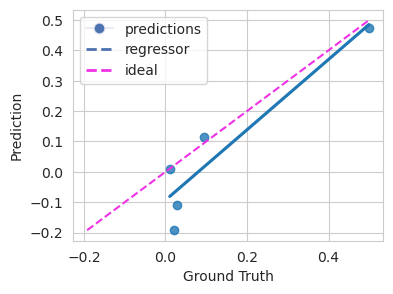

In [21]:
data_linear_with_log, param_cols_with_log = compute_log_transformed_features(data, param_cols)
dfs = split_data_set(data_linear_with_log, param_cols_with_log + ['macs'], SEED)
transformers_dict = {
    "x_preprocessors": [StandardScaler()],
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)
y_hat, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)
# save model & estimates
models['param_log_param_macs'] = model
estimates['param_log_param_macs'] = y_hat

# Comparison of all models

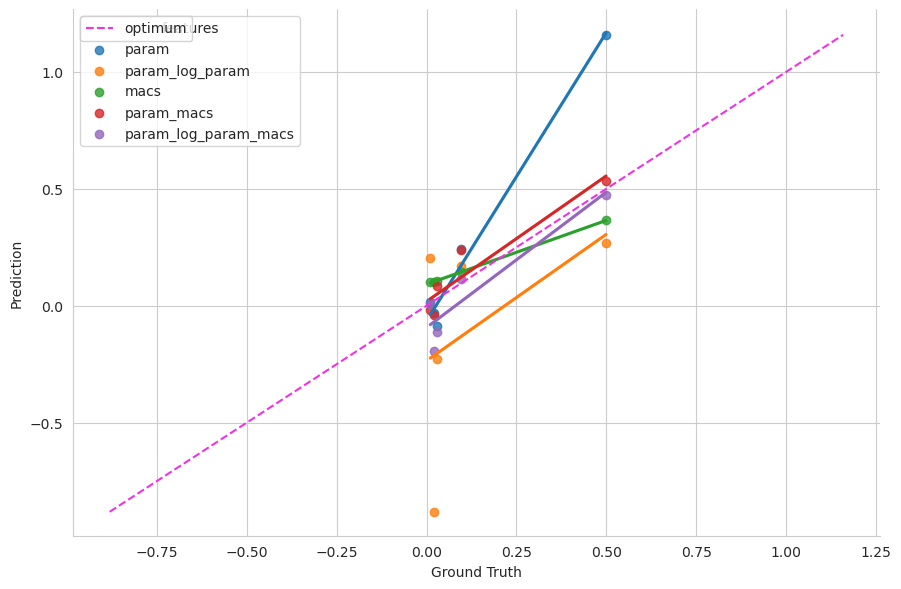

In [22]:
df_to_plot = pd.DataFrame(columns=["features","y_hat",'y'])
for model_name, model in models.items():
    new_df = pd.DataFrame(data={'features':[model_name]*len(dfs['y_test']),'y_hat':np.squeeze(estimates[model_name]),'y':np.squeeze(dfs['y_test'])})
    df_to_plot = pd.concat([df_to_plot, new_df], ignore_index=True)
min_x = min(min(df_to_plot.y_hat),min(df_to_plot.y))
max_x = max(max(df_to_plot.y_hat),max(df_to_plot.y))
g = sns.lmplot(data=df_to_plot, x="y", y="y_hat", hue="features", ci=None, height=6, aspect=1.5, facet_kws={'legend_out':False}, markers='o')
plt.plot([min_x, max_x], [min_x, max_x],ls='--', marker='', label='optimum', color="#f032e6")
line = Line2D([0], [0], ls='--', label='optimum', color='#f032e6')
g.set(xlabel='Ground Truth', ylabel='Prediction')
legend1 = g.legend
legend2 = plt.legend(handles = [plt.plot([],ls="--", color=line.get_color())[0]], labels=[line.get_label()], loc='best')
g.fig.add_artist(legend1)
g.fig.add_artist(legend2)